In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
sb.set()

In [2]:
# Import the data set
DAM_German = pd.read_csv('german.csv')
DAM_German.head()

,Unnamed: 0,status of existing checking account,duration (months),credit history,purpose,credit amount,savings account/bonds,present employment since,installment rate (pct of disposable income),personal status and sex,...,property,age (years),other installment plans,housing,number of existing credits at this bank,job,no. of people being liable to provide maintenance for,telephone,foreign worker,good/bad customer (response)
0,0,A12,48,A32,A43,5951,A61,A73,2,A92,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,1,A14,12,A34,A46,2096,A61,A74,2,A93,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,2,A11,42,A32,A42,7882,A61,A74,2,A93,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,3,A11,24,A33,A40,4870,A61,A73,3,A93,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,4,A14,36,A32,A46,9055,A65,A73,2,A93,...,A124,35,A143,A153,1,A172,2,A192,A201,1


In [3]:
DAM_German = DAM_German.iloc[: , 1:]

In [4]:
DAM_German.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
status of existing checking account                      999 non-null object
duration (months)                                        999 non-null int64
credit history                                           999 non-null object
purpose                                                  999 non-null object
credit amount                                            999 non-null int64
savings account/bonds                                    999 non-null object
present employment since                                 999 non-null object
installment rate (pct of disposable income)              999 non-null int64
personal status and sex                                  999 non-null object
other debtors/guarantors                                 999 non-null object
present residence since                                  999 non-null int64
property                                            

In [5]:
status = pd.DataFrame(DAM_German['status of existing checking account'])
duration = pd.DataFrame(DAM_German['duration (months)'])
credit_history = pd.DataFrame(DAM_German['credit history'])
purpose = pd.DataFrame(DAM_German['purpose'])
credit_amount = pd.DataFrame(DAM_German['credit amount'])
savings = pd.DataFrame(DAM_German['savings account/bonds'])
employment = pd.DataFrame(DAM_German['present employment since'])
installment_rate = pd.DataFrame(DAM_German['installment rate (pct of disposable income)'])
personal_status = pd.DataFrame(DAM_German['personal status and sex'])
debtors = pd.DataFrame(DAM_German['other debtors/guarantors'])
residence = pd.DataFrame(DAM_German['present residence since'])
property_ = pd.DataFrame(DAM_German['property'])
age = pd.DataFrame(DAM_German['age (years)'])
installment_plans = pd.DataFrame(DAM_German['other installment plans'])
housing = pd.DataFrame(DAM_German['housing'])
existing_credits = pd.DataFrame(DAM_German['number of existing credits at this bank'])
job = pd.DataFrame(DAM_German['job'])
liable_maintenance = pd.DataFrame(DAM_German['no. of people being liable to provide maintenance for'])
telephone = pd.DataFrame(DAM_German['telephone'])
foreign_worker = pd.DataFrame(DAM_German['foreign worker'])
good_bad = pd.DataFrame(DAM_German['good/bad customer (response)'])

In [6]:
# Convert categorical variables into dummy variables
from sklearn.preprocessing import OneHotEncoder
status = pd.get_dummies(status)
credit_history = pd.get_dummies(credit_history)
purpose = pd.get_dummies(purpose)
savings = pd.get_dummies(savings)
employment = pd.get_dummies(employment)
personal_status = pd.get_dummies(personal_status)
debtors = pd.get_dummies(debtors)
property_ = pd.get_dummies(property_)
installment_plans = pd.get_dummies(installment_plans)
housing = pd.get_dummies(housing)
job = pd.get_dummies(job)
telephone = pd.get_dummies(telephone)
foreign_worker = pd.get_dummies(foreign_worker)

In [8]:
DAM_German = DAM_German.astype({"status of existing checking account":'category', "credit history": 'category', "purpose": 'category', "savings account/bonds": 'category', "present employment since": 'category',"personal status and sex":'category',"other debtors/guarantors":'category',"property":'category',"other installment plans":'category',"housing":'category',"job":'category',"telephone":'category',"foreign worker":'category',"good/bad customer (response)":'category'})

In [9]:
DAM_German.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
status of existing checking account                      999 non-null category
duration (months)                                        999 non-null int64
credit history                                           999 non-null category
purpose                                                  999 non-null category
credit amount                                            999 non-null int64
savings account/bonds                                    999 non-null category
present employment since                                 999 non-null category
installment rate (pct of disposable income)              999 non-null int64
personal status and sex                                  999 non-null category
other debtors/guarantors                                 999 non-null category
present residence since                                  999 non-null int64
property                              

# Uni Variate Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Function to calculate decision tree accuracies for individual factors
def acc_score (X):
    # Split the Dataset into Train and Test
    x_train, x_test, y_train, y_test = train_test_split(X, good_bad, test_size = 0.25)
    # Decision Tree using Train Data
    dectree = DecisionTreeClassifier(max_depth = None)  # Create the decision tree object
    dectree.fit(x_train, y_train)  
    return dectree.score(x_test, y_test)

In [13]:
score = [acc_score(status), acc_score(duration), acc_score(credit_history), acc_score(purpose), acc_score(credit_amount), 
         acc_score(savings), acc_score(employment), acc_score(installment_rate), acc_score(personal_status), acc_score(debtors),
        acc_score(residence), acc_score(property_), acc_score(age),acc_score(installment_plans),acc_score(housing),
        acc_score(existing_credits),acc_score(job),acc_score(liable_maintenance),acc_score(telephone),acc_score(foreign_worker)]        
score_factors = pd.DataFrame(score, columns = ['Accuracy Score'], 
                      index = ['status', 'duration', 'credit_history', 'purpose','credit_amount','savings','employment',
                               'installment_rate', 'personal_status', 'debtors', 'residence','property_','age','installment_plans',
                              'housing','existing_credits','job','liable_maintenance','telephone','foreign-worker'])
score_factors.sort_values(by = 'Accuracy Score')

,Accuracy Score
credit_amount,0.596
employment,0.660
job,0.664
age,0.680
credit_history,0.684
purpose,0.684
status,0.688
housing,0.692
liable_maintenance,0.696
personal_status,0.700


# Multivariate Decision Tree

In [17]:
# Concat all the individual factors
factors2 = pd.concat([status, duration, credit_history, purpose,credit_amount,savings,employment,
                       installment_rate, personal_status, debtors, residence,property_,age,installment_plans,
                      housing,existing_credits,job,liable_maintenance,telephone,foreign_worker], sort = False, axis = 1)
factors2.head()

,status of existing checking account_A11,status of existing checking account_A12,status of existing checking account_A13,status of existing checking account_A14,duration (months),credit history_A30,credit history_A31,credit history_A32,credit history_A33,credit history_A34,...,number of existing credits at this bank,job_A171,job_A172,job_A173,job_A174,no. of people being liable to provide maintenance for,telephone_A191,telephone_A192,foreign worker_A201,foreign worker_A202
0,0,1,0,0,48,0,0,1,0,0,...,1,0,0,1,0,1,1,0,1,0
1,0,0,0,1,12,0,0,0,0,1,...,1,0,1,0,0,2,1,0,1,0
2,1,0,0,0,42,0,0,1,0,0,...,1,0,0,1,0,2,1,0,1,0
3,1,0,0,0,24,0,0,0,1,0,...,2,0,0,1,0,2,1,0,1,0
4,0,0,0,1,36,0,0,1,0,0,...,1,0,1,0,0,2,0,1,1,0


In [18]:
y = good_bad
X = pd.DataFrame(factors2)

In [19]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (749, 1) (749, 61)
Test Set  : (250, 1) (250, 61)


In [20]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # Create the decision tree object
# Fit Decision Tree on Train Data 
dectree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 0.8603448275862069

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.7348066298342542



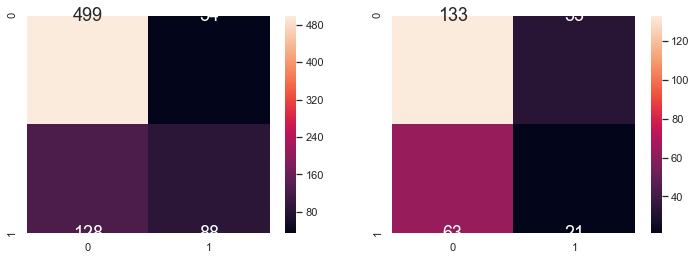

In [23]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Random Forest

In [22]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 bootstrap = True,
                                max_features = 'sqrt') 

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.7957559681697612



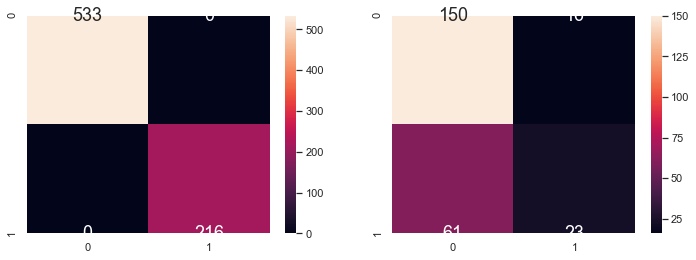

In [24]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Logistic Regression

In [25]:
# Import Logistic Regression model from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
LR = LogisticRegression()
# Fit Logistic Regression on Train Data 
LR.fit(X_train,y_train.values.ravel())

C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.872207327971403

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7808988764044944



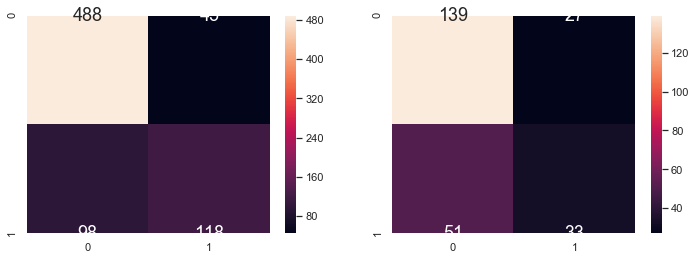

In [26]:
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", f1_score(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", f1_score(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0]) 

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# K-Nearest neighbours

In [27]:
# Import KNN model from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
KNN = KNeighborsClassifier(n_neighbors=27) # k = squareroot N, where N is the number of training data (sqrt(0.75x1000))
KNN.fit(X_train,y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='uniform')

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8357487922705314

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7810945273631841



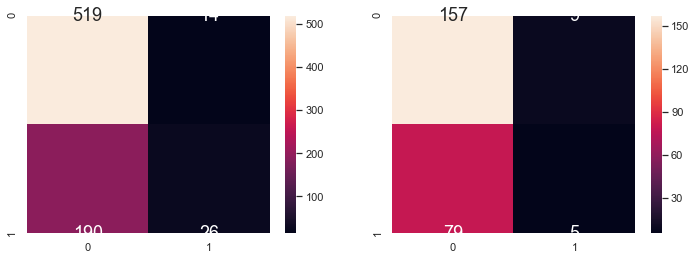

In [28]:
y_train_pred = KNN.predict(X_train)
y_test_pred = KNN.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", f1_score(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", f1_score(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Gradient Boosting

In [29]:
# Import GradientBoostingClassifier model from Scikit-Learn
from sklearn.ensemble import GradientBoostingClassifier

gradboost = GradientBoostingClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                      max_depth = 2,        # Set the maximum depth of each tree
                                      learning_rate = 0.1)  # Learning_rate shrinks the contribution of each tree   

# Fit Gradient Boosting model on Train Data
gradboost.fit(X_train, y_train.values.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 0.8999129677980853

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.7747252747252747



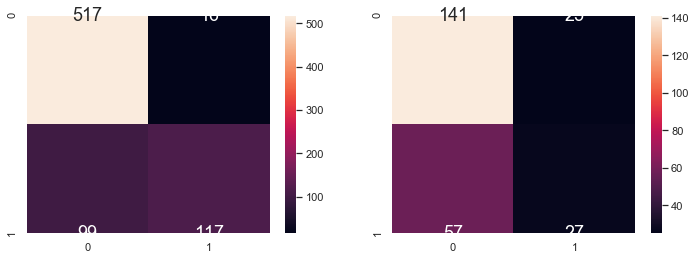

In [30]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = gradboost.predict(X_train)
y_test_pred = gradboost.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred))
print()


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# XG Boost

In [31]:
# Import XGBClassifier model from Scikit-Learn
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 100,     # n_estimators denote number of trees
                    max_depth = 2,          # Set the maximum depth of each tree
                    gamma=0,                # Regularization parameter: min loss reduction required to make a further partition on a leaf node of the tree
                    learning_rate = 0.1,  # Learning_rate shrinks the contribution of each tree   
                    colsample_bytree = 0.3) # Subsample ratio by number of columns when constructing each tree

# Fit XGBoost on Train Data 
xgb.fit(X_train, y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 0.8890829694323144

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.779291553133515



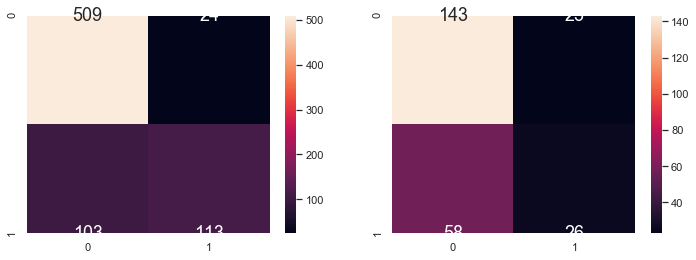

In [32]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Support Vector Machine

In [ ]:
from sklearn import svm
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set

In [ ]:
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

In [ ]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Sigmoid Kernel:", accuracy_sig)